In [114]:

import cv2
import imutils #pip install imutils
import numpy as np
import cupy as cp
import random
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

random.seed(19)

%run ./variables.ipynb
%run ./utils.ipynb
%run ./generator.ipynb


In [96]:
def perdecomp(u):
    ny, nx = u.shape 
    X = np.arange(nx).reshape((1,nx))
    Y = np.arange(ny).reshape((ny,1))
    v = np.zeros((ny,nx))
    v[0,X] = u[0,X] - u[-1,X]
    v[-1,X] = -v[0,X]
    v[Y,0] = v[Y,0] + u[Y,0] - u[Y,-1]
    v[Y,-1] = v[Y,-1] - u[Y,0] + u[Y,-1]
    fx = np.cos(2*np.pi*X/nx)
    fy = np.cos(2*np.pi*Y.T/ny)
    fx[0,0] = 0.   # avoid division by 0 in the line below
    s = np.real(np.fft.ifft2(np.fft.fft2(v)*0.5/(2.-np.repeat(fx, ny, axis = 0)-np.repeat(fy.T, nx, axis = 1))))
    p = u-s
    return p, s

In [111]:
DATASET_PATH = "./data/ra"
images = [f for f in listdir(DATASET_PATH) if isfile(join(DATASET_PATH, f))]
img_path = random.choice(images)

img_path = join(DATASET_PATH, img_path)
print(img_path)

p,s = perdecomp(plt.imread(img_path))



./data/ra/RA_EADN_3875.png


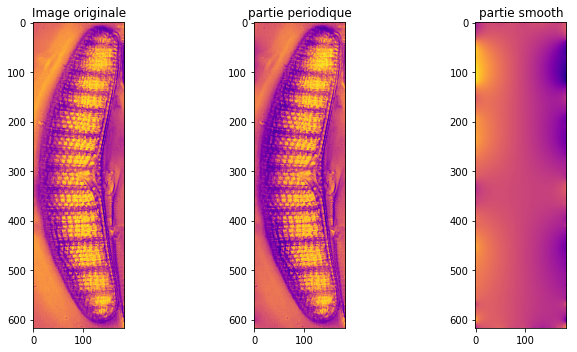

In [113]:
'''
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
axes[0].imshow(plt.imread(img_path), interpolation = 'none', cmap = 'plasma')
axes[0].set_title('Image originale')
axes[1].imshow(p,interpolation = 'none', cmap = 'plasma')
axes[1].set_title('partie periodique')
axes[2].imshow(s,interpolation = 'none', cmap = 'plasma')
axes[2].set_title('partie smooth')
fig.tight_layout()
'''